# PREDICTING THE VALUE OF A USED CAR

The scope of this project is to predict the price of a used vehicle based on its features.

The data was scraped with from the Ebay. Dataset is acquired from Kaggle:  https://www.kaggle.com/orgesleka/used-cars-database/data

Clients and why do they care about this problem?

a.     	Individual Buyers: Whoever interested in buying a new car wonders about the actual value of the specific car with the one, which was asked by the seller. So it is important for all to come to a better understanding of the values of the cars.

b.     	Dealers: Most dealers would like to learn the value of that individual car, and determine its value later on.

c.     	Individual Sellers: Most private sellers would need the value of their car since the value is not constant, it changes considering the depreciation, the repairs etc.

d.     	Websites or Applications created to help private parties or dealers sell their vehicles.

Problem and questions:

Can i predict the value of a used car by the data acquired from ebay used cars web page?
What is my target feature?
Are all the features relevant for the analysis?
Are there missing or wrong entries?
What else can i predict? How much of an impact do certain features (such as 'age of the car', 'kilometer' etc.) have on the price?


## Data Wrangling & Cleaning¶


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
import seaborn as sns
import warnings
from scipy import stats

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

After importing the libraries, we need to read the file and see the details of the data we are working on

In [2]:
df=pd.read_csv('autos.csv', header=0, encoding = 'ISO-8859-1',index_col=1)
df.head() 

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dateCrawled,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
name,,,,,,,,,,,,,,,,,,,
Golf_3_1.6,3/24/16 11:52,privat,Angebot,480.0,test,NaN,1993,manuell,0,golf,150000.0,0,benzin,volkswagen,NaN,3/24/16 0:00,0.0,70435.0,4/7/16 3:16
A5_Sportback_2.7_Tdi,3/24/16 10:58,privat,Angebot,18300.0,test,coupe,2011,manuell,190,NaN,125000.0,5,diesel,audi,ja,3/24/16 0:00,0.0,66954.0,4/7/16 1:46
"Jeep_Grand_Cherokee_""Overland""",3/14/16 12:52,privat,Angebot,9800.0,test,suv,2004,automatik,163,grand,125000.0,8,diesel,jeep,NaN,3/14/16 0:00,0.0,90480.0,4/5/16 12:47
GOLF_4_1_4__3TRER,3/17/16 16:54,privat,Angebot,1500.0,test,kleinwagen,2001,manuell,75,golf,150000.0,6,benzin,volkswagen,nein,3/17/16 0:00,0.0,91074.0,3/17/16 17:40
Skoda_Fabia_1.4_TDI_PD_Classic,3/31/16 17:25,privat,Angebot,3600.0,test,kleinwagen,2008,manuell,69,fabia,90000.0,7,diesel,skoda,nein,3/31/16 0:00,0.0,60437.0,4/6/16 10:17


While reading the original csv file, to deal with the 'UnicodeDecodeError', I added encoding="utf-8" in order to prevent the reading error

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371539 entries, Golf_3_1.6 to BMW_M135i_vollausgestattet_NP_52.720____Euro
Data columns (total 19 columns):
dateCrawled            371539 non-null object
seller                 371538 non-null object
offerType              371538 non-null object
price                  371538 non-null float64
abtest                 371538 non-null object
vehicleType            333669 non-null object
yearOfRegistration     371538 non-null object
gearbox                351328 non-null object
powerPS                371538 non-null object
model                  351054 non-null object
kilometer              371538 non-null float64
monthOfRegistration    371538 non-null object
fuelType               338151 non-null object
brand                  371537 non-null object
notRepairedDamage      299477 non-null object
dateCreated            371537 non-null object
nrOfPictures           371537 non-null float64
postalCode             371537 non-null float64
lastSeen       

It looks like there are some null values in some of the features 

In [4]:
df.columns

Index(['dateCrawled', 'seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen'],
      dtype='object')

In [5]:
df.describe(include='all')

,dateCrawled,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371539,371538,371538,3.715380e+05,371538,333669,371538.0,351328,371538.0,351054,371538.000000,371538.0,338151,371537,299477,371537,371537.0,371537.000000,371537
unique,15623,3,3,NaN,3,9,245.0,2,1174.0,252,NaN,27.0,7,40,2,114,NaN,NaN,18705
top,3/5/16 14:25,privat,Angebot,NaN,test,limousine,2000.0,manuell,0.0,golf,NaN,0.0,benzin,volkswagen,nein,4/3/16 0:00,NaN,NaN,4/7/16 6:45
freq,68,371534,371525,NaN,192591,95896,22394.0,274219,37244.0,30070,NaN,34364.0,223863,79640,263189,14451,NaN,NaN,708
mean,NaN,NaN,NaN,1.729584e+04,NaN,NaN,NaN,NaN,NaN,NaN,125617.954096,NaN,NaN,NaN,NaN,NaN,0.0,50820.666402,NaN
std,NaN,NaN,NaN,3.587905e+06,NaN,NaN,NaN,NaN,NaN,NaN,40113.065296,NaN,NaN,NaN,NaN,NaN,0.0,25799.080292,NaN
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000,NaN,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,1.150000e+03,NaN,NaN,NaN,NaN,NaN,NaN,125000.000000,NaN,NaN,NaN,NaN,NaN,0.0,30459.000000,NaN
50%,NaN,NaN,NaN,2.950000e+03,NaN,NaN,NaN,NaN,NaN,NaN,150000.000000,NaN,NaN,NaN,NaN,NaN,0.0,49610.000000,NaN
75%,NaN,NaN,NaN,7.200000e+03,NaN,NaN,NaN,NaN,NaN,NaN,150000.000000,NaN,NaN,NaN,NaN,NaN,0.0,71546.000000,NaN


Seeing the description of the dataframe, we can see the different number of counts (because of missing values), non-english words. For the maximum values of 'yearOfRegistration' or 'powerPS', the value is NaN, which means that some rows have differrent types other than an integer or a float.

In [6]:
df.describe(include='object')

,dateCrawled,seller,offerType,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
count,371539,371538,371538,371538,333669,371538,351328,371538,351054,371538,338151,371537,299477,371537,371537
unique,15623,3,3,3,9,245,2,1174,252,27,7,40,2,114,18705
top,3/5/16 14:25,privat,Angebot,test,limousine,2000,manuell,0,golf,0,benzin,volkswagen,nein,4/3/16 0:00,4/7/16 6:45
freq,68,371534,371525,192591,95896,22394,274219,37244,30070,34364,223863,79640,263189,14451,708


In order to evaluate the missing values, duplicates, wrong entries or outliers, a defined 'stat' function helps us to see the relevant info on a data frame

In [7]:
colons = df.columns

def stat(dataframe, columns):
    print("Total number of rows : ",len(dataframe))
    res = []
    for col in colons:
        NumberOfNull = dataframe[col].isnull().sum()
        NoOfUnique = dataframe[col].nunique()
        ValueCounts = dataframe[col].value_counts().sort_values(ascending=False).head(10)
        res.append((col,NumberOfNull,NoOfUnique,ValueCounts))

            
            
    metric = pd.DataFrame.from_records(res,columns=["Column_names","Null_Counts","Unique_Counts","Value_Counts"])
    return metric

pd.set_option('max_colwidth', 800)
stat(df,colons)

Total number of rows :  371539


,Column_names,Null_Counts,Unique_Counts,Value_Counts
0,dateCrawled,0,15623,"3/5/16 14:25 68 3/5/16 14:26 62 3/5/16 15:48 58 3/5/16 17:49 58 3/27/16 15:50 55 3/29/16 21:50 55 3/21/16 16:50 55 3/20/16 11:50 55 3/16/16 18:49 55 3/5/16 14:49 55 Name: dateCrawled, dtype: int64"
1,seller,1,3,"privat 371534 gewerblich 3 90 1 Name: seller, dtype: int64"
2,offerType,1,3,"Angebot 371525 Gesuch 12 golf 1 Name: offerType, dtype: int64"
3,price,1,5597,"0.0 10778 500.0 5670 1500.0 5394 1000.0 4649 1200.0 4594 2500.0 4438 600.0 3819 3500.0 3792 800.0 3784 2000.0 3432 Name: price, dtype: int64"
4,abtest,1,3,"test 192591 control 178946 4 1 Name: abtest, dtype: int64"
5,vehicleType,37870,9,"limousine 95896 kleinwagen 80026 kombi 67564 bus 30202 cabrio 22899 coupe 19016 suv 14708 andere 3357 benzin 1 Name: vehicleType, dtype: int64"
6,yearOfRegistration,1,245,"2000 22394 1999 20798 2005 20271 2006 18417 2001 18415 2003 18117 2004 18000 2002 17512 1998 16426 2007 16085 Name: yearOfRegistration, dtype: int64"
7,gearbox,20211,2,"manuell 274219 automatik 77109 Name: gearbox, dtype: int64"
8,powerPS,1,1174,"0 37244 75 21991 60 14548 150 14033 140 12383 101 12112 90 11577 116 10949 170 10019 105 9503 Name: powerPS, dtype: int64"
9,model,20485,252,"golf 30070 andere 26404 3er 20567 polo 13092 corsa 12573 astra 10830 passat 10306 a4 10257 c_klasse 8776 5er 8546 Name: model, dtype: int64"


Seller feature : only 3 out of 371539 observations are dealer. So this feature can be dropped.

Offer Type feature : 12 out of 371539 observations are 'Gesuch'. So this feature can be dropped.

Number of Pictures feature has all 0 values. So this feature can also be dropped.

powerPS feature have 37244 of 0 values (which is a wrong entry).

14 unique numbers for the 'kilometer' (mileage) exist. So we can keep them all since there is no outlier.

7 features are discrete, numbers, whereas 12 features are object (string, datetime....)

Shape of the data is 371539x20

"vehicleType, gearbox, model, fuelType, brand, notRepairedDamage" Features have missing values!!!

In [8]:
missing_values = df.isnull().sum()
missing_values

dateCrawled                0
seller                     1
offerType                  1
price                      1
abtest                     1
vehicleType            37870
yearOfRegistration         1
gearbox                20211
powerPS                    1
model                  20485
kilometer                  1
monthOfRegistration        1
fuelType               33388
brand                      2
notRepairedDamage      72062
dateCreated                2
nrOfPictures               2
postalCode                 2
lastSeen                   2
dtype: int64

Some features can be dropped:

seller             : only 3 observations are dealer,

offerType          : Only 12 of all offers are gesuch (request),

nrOfPictures       : None of the entries have pictures,

monthOfRegistration: Not important, since there is also a yearOfRegistration feature

In [9]:
ndf=df.drop(['seller','offerType','nrOfPictures','abtest', 'monthOfRegistration'], axis=1)
ndf.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
name,,,,,,,,,,,,,,
Golf_3_1.6,3/24/16 11:52,480.0,NaN,1993,manuell,0,golf,150000.0,benzin,volkswagen,NaN,3/24/16 0:00,70435.0,4/7/16 3:16
A5_Sportback_2.7_Tdi,3/24/16 10:58,18300.0,coupe,2011,manuell,190,NaN,125000.0,diesel,audi,ja,3/24/16 0:00,66954.0,4/7/16 1:46
"Jeep_Grand_Cherokee_""Overland""",3/14/16 12:52,9800.0,suv,2004,automatik,163,grand,125000.0,diesel,jeep,NaN,3/14/16 0:00,90480.0,4/5/16 12:47
GOLF_4_1_4__3TRER,3/17/16 16:54,1500.0,kleinwagen,2001,manuell,75,golf,150000.0,benzin,volkswagen,nein,3/17/16 0:00,91074.0,3/17/16 17:40
Skoda_Fabia_1.4_TDI_PD_Classic,3/31/16 17:25,3600.0,kleinwagen,2008,manuell,69,fabia,90000.0,diesel,skoda,nein,3/31/16 0:00,60437.0,4/6/16 10:17


If there are duplicate values, one of them should be deleted

In [10]:
print(ndf.duplicated().sum())
ndf = ndf.drop_duplicates()

238


Since the null values are strings, i decided to delete them. 

In [11]:
ndffull=ndf.dropna()
ndffull.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
name,,,,,,,,,,,,,,
GOLF_4_1_4__3TRER,3/17/16 16:54,1500.0,kleinwagen,2001,manuell,75,golf,150000.0,benzin,volkswagen,nein,3/17/16 0:00,91074.0,3/17/16 17:40
Skoda_Fabia_1.4_TDI_PD_Classic,3/31/16 17:25,3600.0,kleinwagen,2008,manuell,69,fabia,90000.0,diesel,skoda,nein,3/31/16 0:00,60437.0,4/6/16 10:17
BMW_316i___e36_Limousine___Bastlerfahrzeug__Export,4/4/16 17:36,650.0,limousine,1995,manuell,102,3er,150000.0,benzin,bmw,ja,4/4/16 0:00,33775.0,4/6/16 19:17
Peugeot_206_CC_110_Platinum,4/1/16 20:48,2200.0,cabrio,2004,manuell,109,2_reihe,150000.0,benzin,peugeot,nein,4/1/16 0:00,67112.0,4/5/16 18:18
VW_Derby_Bj_80__Scheunenfund,3/21/16 18:54,0.0,limousine,1980,manuell,50,andere,40000.0,benzin,volkswagen,nein,3/21/16 0:00,19348.0,3/25/16 16:47


There are some non-English words that need to be translated into ENglish

In [12]:
df = ndffull.replace(['nein','ja','benzin','andere','elektro','manuell','automatik','kleinwagen','kombi'],['no','yes','gas','other','electric','manual','automatic','smallCar','stationWagon'])
df.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
name,,,,,,,,,,,,,,
GOLF_4_1_4__3TRER,3/17/16 16:54,1500.0,smallCar,2001,manual,75,golf,150000.0,gas,volkswagen,no,3/17/16 0:00,91074.0,3/17/16 17:40
Skoda_Fabia_1.4_TDI_PD_Classic,3/31/16 17:25,3600.0,smallCar,2008,manual,69,fabia,90000.0,diesel,skoda,no,3/31/16 0:00,60437.0,4/6/16 10:17
BMW_316i___e36_Limousine___Bastlerfahrzeug__Export,4/4/16 17:36,650.0,limousine,1995,manual,102,3er,150000.0,gas,bmw,yes,4/4/16 0:00,33775.0,4/6/16 19:17
Peugeot_206_CC_110_Platinum,4/1/16 20:48,2200.0,cabrio,2004,manual,109,2_reihe,150000.0,gas,peugeot,no,4/1/16 0:00,67112.0,4/5/16 18:18
VW_Derby_Bj_80__Scheunenfund,3/21/16 18:54,0.0,limousine,1980,manual,50,other,40000.0,gas,volkswagen,no,3/21/16 0:00,19348.0,3/25/16 16:47


There are some nonsense data and outliers such as yearofRegistrain: '1000', and '9999', price:0, 100000 (that high price could be a classic car, however it is an outlier since it can not be evaluated among normal used cars) , powerPS:0 or 10000

While dealing with wrong entries and outliers, some errors popped-up (such as different data types in a certain column. I made all data types in a certain column the same in order to prevent the error.



In [13]:
df['yearOfRegistration']=df['yearOfRegistration'].astype(int)
df['price']=df['price'].astype(float)
df['powerPS']=df['powerPS'].astype(int)

In [14]:
print('Number of Cars with newer entries than 2016 :',(df['yearOfRegistration'] > 2016).sum())
print('Number of Cars with older entries than 1970 :',(df['yearOfRegistration'] < 1970).sum())
print('Number of Cars more powerful than 600 :',(df['powerPS'] > 600).sum())
print('Number of Cars more expensive than 100000 :',(df['price'] > 100000).sum())

Number of Cars with newer entries than 2016 : 11
Number of Cars with older entries than 1970 : 673
Number of Cars more powerful than 600 : 191
Number of Cars more expensive than 100000 : 226


These outliers and wrong entries are filtered below

In [15]:

years = ((df.yearOfRegistration <= 2016) & (df.yearOfRegistration >= 1970))

price = (df.price <= 100000)&(df.price > 100)

power = ((df.powerPS <= 600) & (df.powerPS >= 5))

dfclean = df[years & price & power]


dfclean.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
name,,,,,,,,,,,,,,
GOLF_4_1_4__3TRER,3/17/16 16:54,1500.0,smallCar,2001,manual,75,golf,150000.0,gas,volkswagen,no,3/17/16 0:00,91074.0,3/17/16 17:40
Skoda_Fabia_1.4_TDI_PD_Classic,3/31/16 17:25,3600.0,smallCar,2008,manual,69,fabia,90000.0,diesel,skoda,no,3/31/16 0:00,60437.0,4/6/16 10:17
BMW_316i___e36_Limousine___Bastlerfahrzeug__Export,4/4/16 17:36,650.0,limousine,1995,manual,102,3er,150000.0,gas,bmw,yes,4/4/16 0:00,33775.0,4/6/16 19:17
Peugeot_206_CC_110_Platinum,4/1/16 20:48,2200.0,cabrio,2004,manual,109,2_reihe,150000.0,gas,peugeot,no,4/1/16 0:00,67112.0,4/5/16 18:18
Mazda_3_1.6_Sport,3/26/16 19:54,2000.0,limousine,2004,manual,105,3_reihe,150000.0,gas,mazda,no,3/26/16 0:00,96224.0,4/6/16 10:45


In [16]:
dfclean.shape

(246274, 14)

Adding feautures: I decided to add an ‘age’ column with the help of ‘year of registration’ feature. This new column is an important aspect regarding the price of the cars (with the following coding)

In [17]:

df2=dfclean.copy()
df2.dateCreated = pd.to_datetime(dfclean.dateCreated)
df2['Age']=np.nan
# first create age column
#dfclean['Age']=np.nan
df2['Age'] = df2.dateCreated.dt.year - df2.yearOfRegistration
df2.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,Age
name,,,,,,,,,,,,,,,
GOLF_4_1_4__3TRER,3/17/16 16:54,1500.0,smallCar,2001,manual,75,golf,150000.0,gas,volkswagen,no,2016-03-17,91074.0,3/17/16 17:40,15
Skoda_Fabia_1.4_TDI_PD_Classic,3/31/16 17:25,3600.0,smallCar,2008,manual,69,fabia,90000.0,diesel,skoda,no,2016-03-31,60437.0,4/6/16 10:17,8
BMW_316i___e36_Limousine___Bastlerfahrzeug__Export,4/4/16 17:36,650.0,limousine,1995,manual,102,3er,150000.0,gas,bmw,yes,2016-04-04,33775.0,4/6/16 19:17,21
Peugeot_206_CC_110_Platinum,4/1/16 20:48,2200.0,cabrio,2004,manual,109,2_reihe,150000.0,gas,peugeot,no,2016-04-01,67112.0,4/5/16 18:18,12
Mazda_3_1.6_Sport,3/26/16 19:54,2000.0,limousine,2004,manual,105,3_reihe,150000.0,gas,mazda,no,2016-03-26,96224.0,4/6/16 10:45,12


In [18]:
df=df2
df.reset_index(drop=False)
df.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,Age
name,,,,,,,,,,,,,,,
GOLF_4_1_4__3TRER,3/17/16 16:54,1500.0,smallCar,2001,manual,75,golf,150000.0,gas,volkswagen,no,2016-03-17,91074.0,3/17/16 17:40,15
Skoda_Fabia_1.4_TDI_PD_Classic,3/31/16 17:25,3600.0,smallCar,2008,manual,69,fabia,90000.0,diesel,skoda,no,2016-03-31,60437.0,4/6/16 10:17,8
BMW_316i___e36_Limousine___Bastlerfahrzeug__Export,4/4/16 17:36,650.0,limousine,1995,manual,102,3er,150000.0,gas,bmw,yes,2016-04-04,33775.0,4/6/16 19:17,21
Peugeot_206_CC_110_Platinum,4/1/16 20:48,2200.0,cabrio,2004,manual,109,2_reihe,150000.0,gas,peugeot,no,2016-04-01,67112.0,4/5/16 18:18,12
Mazda_3_1.6_Sport,3/26/16 19:54,2000.0,limousine,2004,manual,105,3_reihe,150000.0,gas,mazda,no,2016-03-26,96224.0,4/6/16 10:45,12


It looks like the names and the models of the cars are complex and very long. There are also brand and model columns, no need to use the 'name' column

I would like to rearrange the order of the columns in order to see the brands and models first, 'price' as the last

In [19]:
df=df[['brand',
                 'model',
                 'vehicleType',
                 'yearOfRegistration',
                 'gearbox','powerPS',
                 'kilometer',
                 'fuelType',
                 'notRepairedDamage',
                 'dateCreated',
                 'postalCode',
                 'lastSeen',
                 'Age',
                 'price']]
df=df.reset_index(drop=True)
df.head()

,brand,model,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,notRepairedDamage,dateCreated,postalCode,lastSeen,Age,price
0,volkswagen,golf,smallCar,2001,manual,75,150000.0,gas,no,2016-03-17,91074.0,3/17/16 17:40,15,1500.0
1,skoda,fabia,smallCar,2008,manual,69,90000.0,diesel,no,2016-03-31,60437.0,4/6/16 10:17,8,3600.0
2,bmw,3er,limousine,1995,manual,102,150000.0,gas,yes,2016-04-04,33775.0,4/6/16 19:17,21,650.0
3,peugeot,2_reihe,cabrio,2004,manual,109,150000.0,gas,no,2016-04-01,67112.0,4/5/16 18:18,12,2200.0
4,mazda,3_reihe,limousine,2004,manual,105,150000.0,gas,no,2016-03-26,96224.0,4/6/16 10:45,12,2000.0


In [20]:
df.brand.value_counts()

volkswagen       51514
bmw              29148
mercedes_benz    25413
opel             24457
audi             23883
ford             16130
renault          10610
peugeot           7428
fiat              5868
seat              4770
skoda             4374
mazda             3830
toyota            3526
citroen           3441
nissan            3314
smart             3192
mini              2813
hyundai           2664
volvo             2441
mitsubishi        1932
honda             1846
kia               1838
porsche           1676
alfa_romeo        1604
suzuki            1590
chevrolet         1229
chrysler           929
dacia              688
land_rover         600
jeep               570
subaru             519
daihatsu           472
jaguar             448
saab               405
daewoo             300
lancia             300
rover              241
trabant            143
lada               128
Name: brand, dtype: int64

Now the names (brands) and the models of the cars are simple and clean

In [21]:
abs_price=df['price'].abs() 
df['price']=abs_price

In [22]:
df.to_csv('autoclean.csv',index=True)

## DATA STORYTELLING

### Explaratory Data Analysis - Visualization¶

In [23]:
df.describe(include='all')

,brand,model,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,notRepairedDamage,dateCreated,postalCode,lastSeen,Age,price
count,246274,246274,246274,246274.000000,246274,246274.000000,246274.000000,246274,246274,246274,246274.000000,246274,246274.000000,246274.000000
unique,39,250,8,NaN,2,NaN,NaN,7,2,107,NaN,16483,NaN,NaN
top,volkswagen,golf,limousine,NaN,manual,NaN,NaN,gas,no,2016-04-03 00:00:00,NaN,4/7/16 6:45,NaN,NaN
freq,51514,20051,72585,NaN,188254,NaN,NaN,158176,222172,9795,NaN,512,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-20 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-07 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2003.602004,NaN,129.335143,123803.832317,NaN,NaN,NaN,52133.697950,NaN,12.397898,6778.524331
std,NaN,NaN,NaN,6.104859,NaN,61.335791,39776.954847,NaN,NaN,NaN,25814.660694,NaN,6.104906,7965.123775
min,NaN,NaN,NaN,1970.000000,NaN,5.000000,5000.000000,NaN,NaN,NaN,1067.000000,NaN,0.000000,101.000000
25%,NaN,NaN,NaN,2000.000000,NaN,86.000000,100000.000000,NaN,NaN,NaN,31582.000000,NaN,8.000000,1699.000000


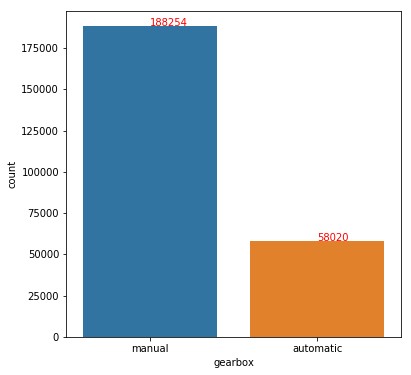

In [24]:

plt.subplots(figsize=(6,6))
plt1 = sns.countplot(x='gearbox',data=df)

for x, y in df.gearbox.value_counts().reset_index().iterrows():
    plt1.text(x,y.gearbox,y.gearbox,color='red',fontsize=10)

Regarding the gearbox, manual cars are more widespread

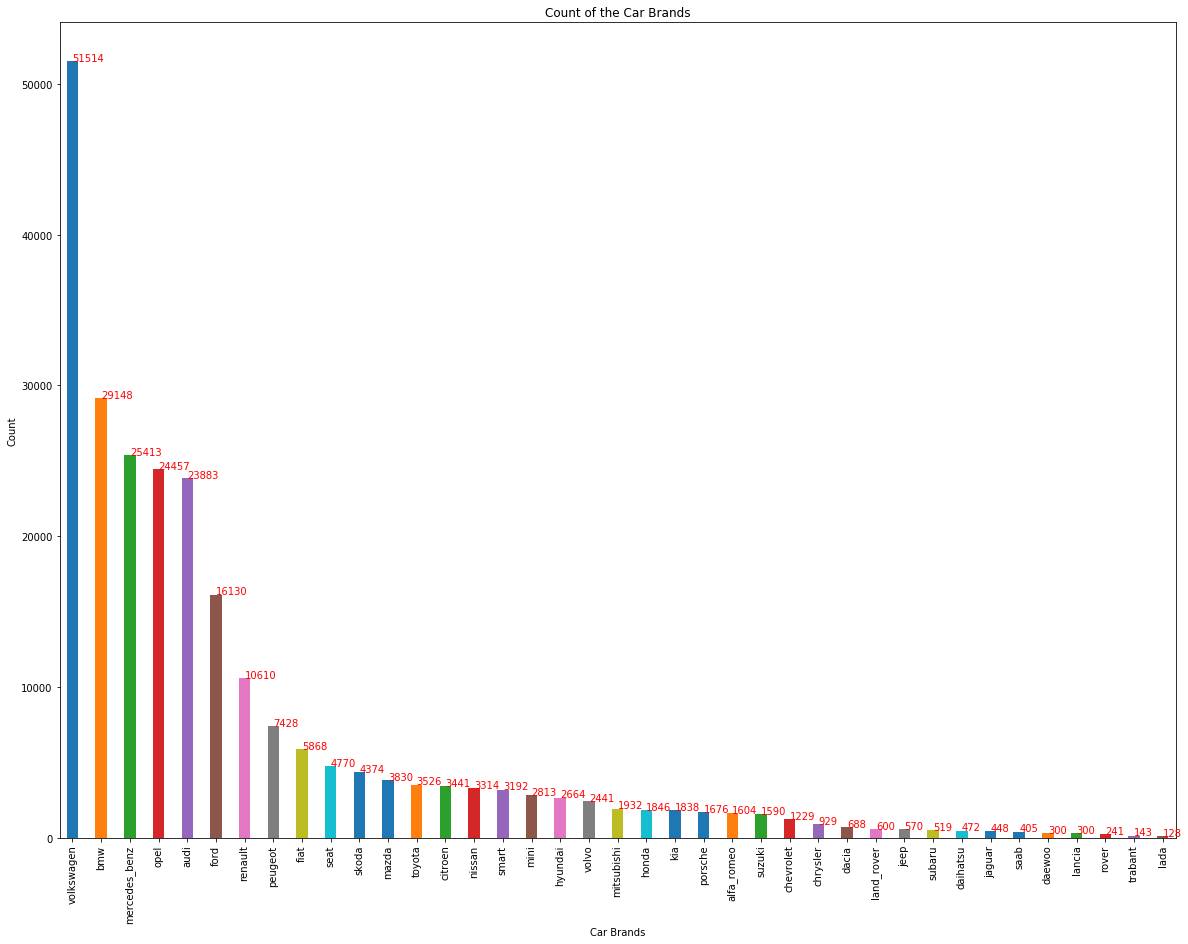

In [25]:

plt.subplots(figsize=(20,15))
plt2=df.brand.value_counts().plot.bar(width=0.4)
#plt.xticks(rotation=15)

for x, y in df.brand.value_counts().reset_index().iterrows():
    plt2.text(x,y.brand,y.brand,color='red',fontsize=10)
    
plt.xlabel('Car Brands')
plt.ylabel('Count')
plt.title('Count of the Car Brands')
plt.show()

Regarding the brand, Valkwagen is the most used car, and German cars are more prevalent.

Similarly, we can see the fuel types:

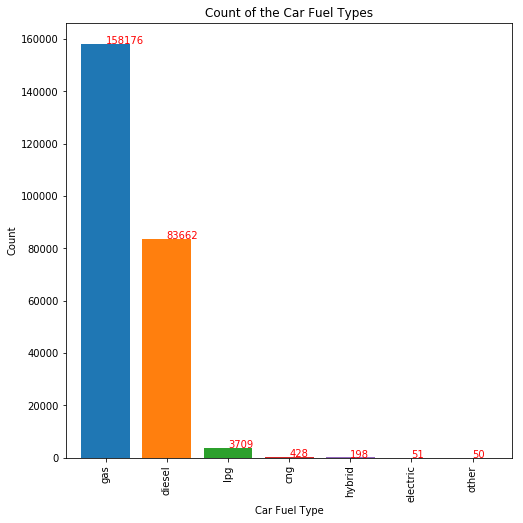

In [26]:
plt.subplots(figsize=(8,8))
plt3=df.fuelType.value_counts().plot.bar(width=0.8)

for x, y in df.fuelType.value_counts().reset_index().iterrows():
    plt3.text(x,y.fuelType,y.fuelType,color='red',fontsize=10)
    
plt.xlabel('Car Fuel Type')
plt.ylabel('Count')
plt.title('Count of the Car Fuel Types')
plt.show()

Since the gas prices in Europe are higher than the US, diesel, lpg and cng cars can be seen. However, regular gas using cars are widespread.

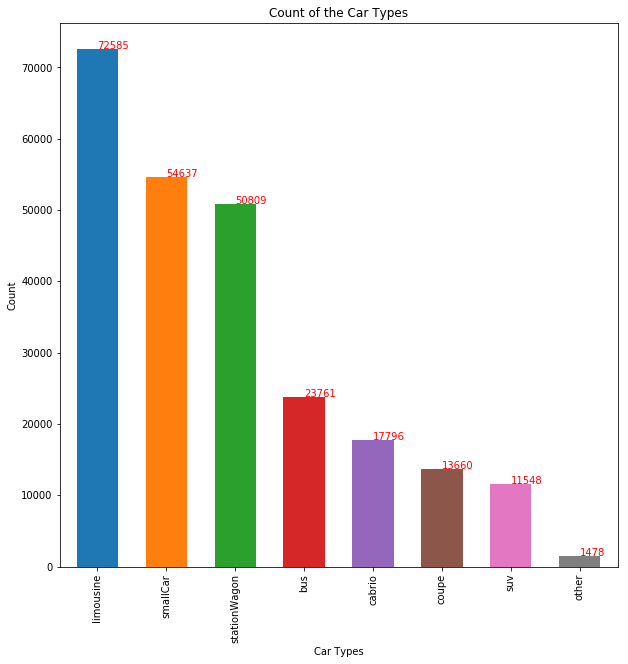

In [27]:

plt.subplots(figsize=(10,10))
plt4=df.vehicleType.value_counts().plot.bar(width=0.6)

for x, y in df.vehicleType.value_counts().reset_index().iterrows():
    plt4.text(x,y.vehicleType,y.vehicleType,color='red',fontsize=10)
    
plt.xlabel('Car Types')
plt.ylabel('Count')
plt.title('Count of the Car Types')
plt.show()

'Limousine' is used for sedan cars in Europe. Sedan is the most owned type in Europe

Now, we can compare more than one features with others

## Price and Brand

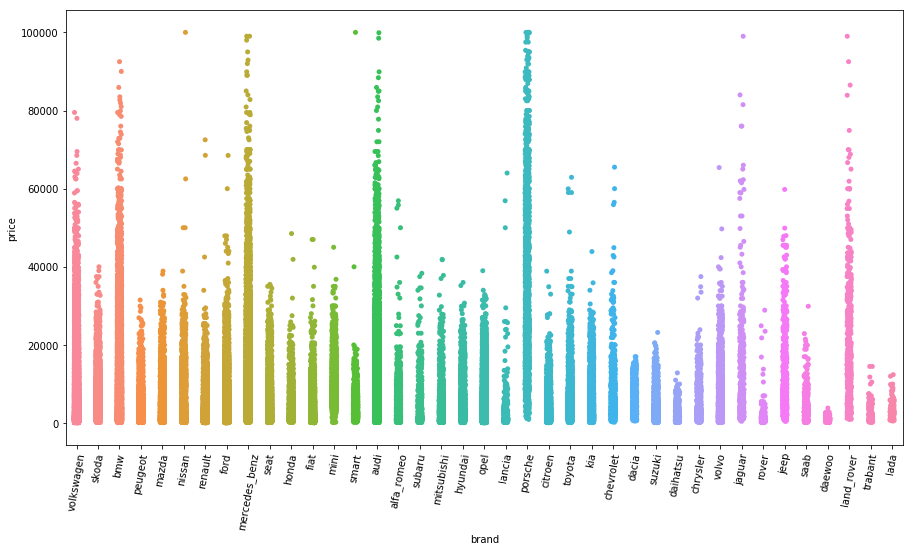

In [28]:
plt.subplots(figsize=(15,8))
sns.stripplot(x='brand',y='price',data=df, size=5)
plt.xticks(rotation=80)
plt.show()

## the mileage and the price.¶

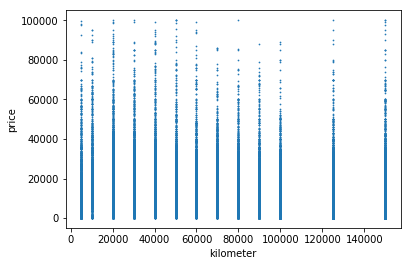

In [29]:
df.plot(kind='scatter', x='kilometer', y='price', s=0.5)

It looks like a scatter plot is not a good idea to see the relation between kilometer and the price since the users entered round values (such as 30000 or 60000). A violin plot might be helpful

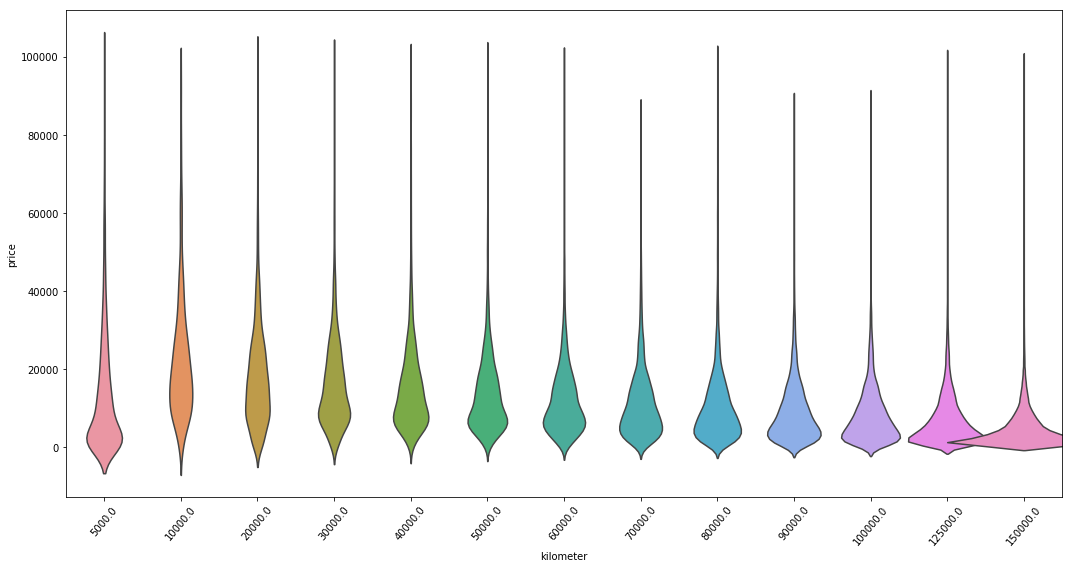

In [30]:
plt.subplots(figsize=[15,8])
sns.violinplot(x='kilometer',y='price',data=df,inner=None,width=2)
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

## Age and the price.¶

As a general opinion, age is an important factor regarding the price of a car

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


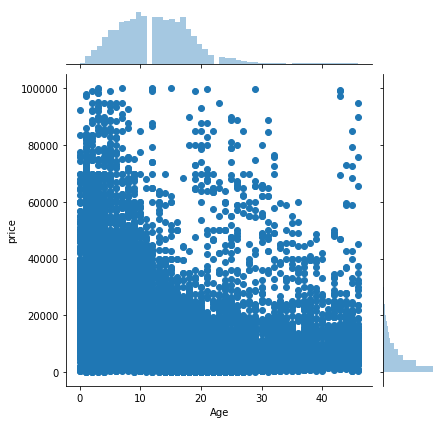

In [31]:
sns.jointplot(x='Age',y='price',data=df)

It is clear that young cars have higher prices than old cars, although there are outliers (very expensive old cars, may be classical or a certain brand)

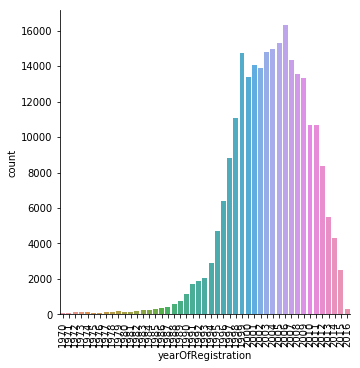

In [32]:
p = sns.catplot('yearOfRegistration',data=df, kind='count', legend_out=True)
p.set_xticklabels(rotation=90)

Most of the used cars are registered between 2000 and 2010

150000.0
5000.0
123803.83231685034


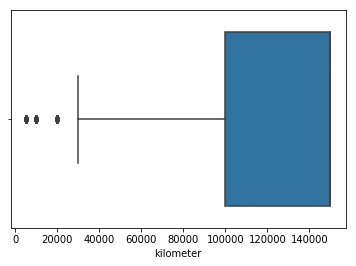

In [33]:
sns.boxplot(df.kilometer)
print(max(df.kilometer))
print(min(df.kilometer))
print(df['kilometer'].mean())

Kilometer is an important feature regarding the price of a used car. Many cars milage are between 100K-150K with a mean value of 123803

## Correlation Map

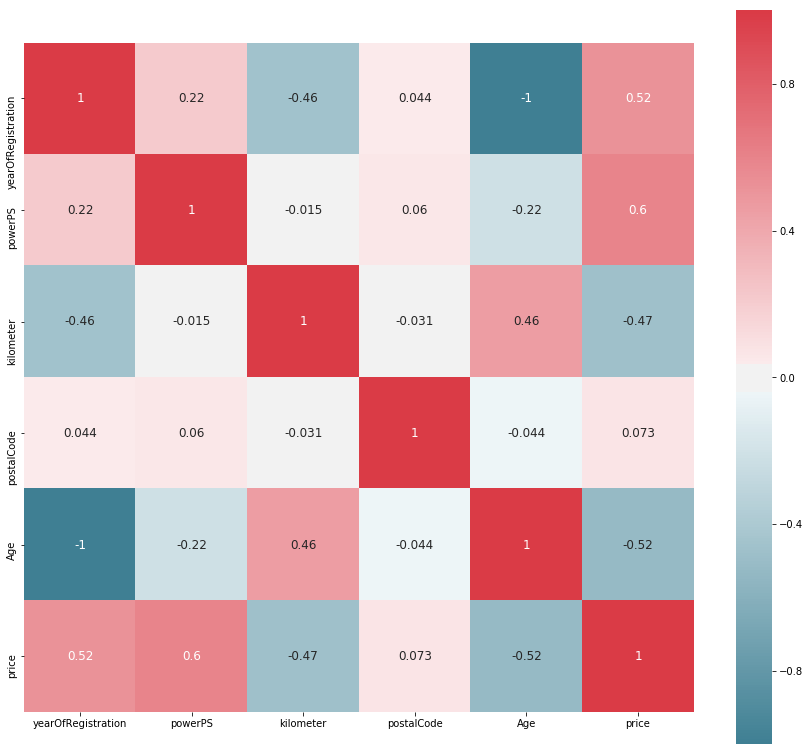

In [34]:
def plot_corr(df):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 15 , 15 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 })
plot_corr(df)

Regarding our target feature 'price', some important related features: 

Age has a negative relationship (-0.52), 

Kilometer has a negative relationship (-0.47)

PowerPS has a positive relationship (0.52)

## Inferential Statistics¶


It is important to find out that distribution of value (price) of the cars normal or not.

For this, we can perform a hypothesis testing,

Null Hypothesis: The value of the used cars is a normal distribution

Alternate Hypothesis: The value of the used cars is not a normal distribution

Significance level alpha is 0.05



In [35]:
# For an Empirical Cumulative Distribution Function (ECDF):

def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

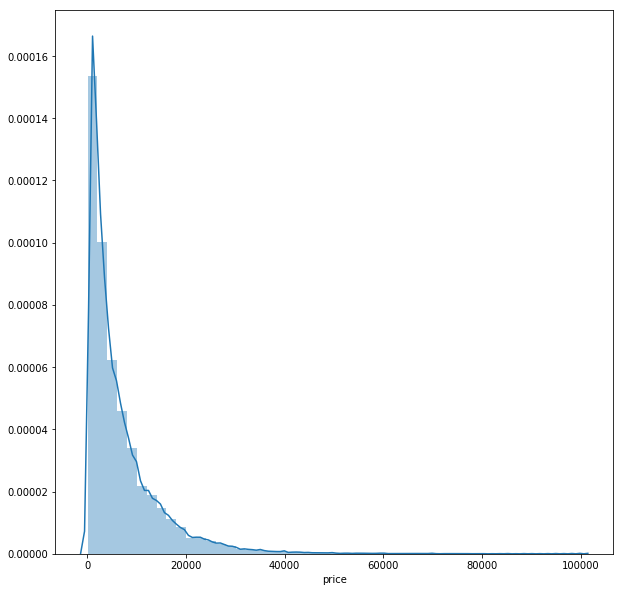

In [36]:
# plot the price with a distribution plot

plt.subplots(figsize=(10,10))
sns.distplot(df.price)

Even though the shape of the plot doesn't look like normally distributed (not like a bell curve), according to central limit theorem, a sample population might be normally distributed in this data set. Thus, we should further select a random sample, test and see the ECDF

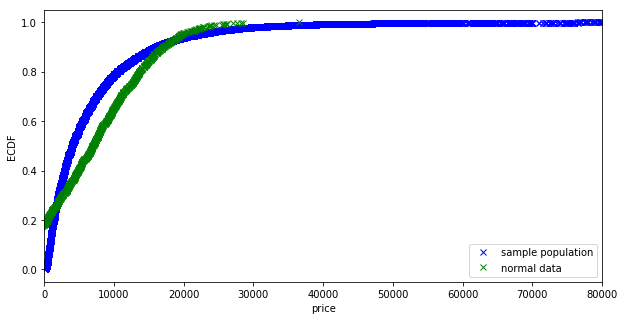

In [37]:
plt.subplots(figsize=(10,5))
x,y=ecdf(df.price)
plt.plot(x,y,marker='x',linestyle='none',color='blue')

normal_d = np.random.normal(np.mean(df.price),np.std(df.price),size=1000)
x_n,y_n = ecdf(normal_d)
plt.plot(x_n,y_n,marker='x',linestyle='none',color='green')
plt.xlim(0,80000)

plt.xlabel('price')
plt.ylabel('ECDF')
plt.legend(['sample population','normal data'],loc='lower right')

plt.show()

In [38]:
# Lets also run a normal test to the price data

stats.normaltest(df.price)


NormaltestResult(statistic=166943.96821395433, pvalue=0.0)

Since the p value is smaller than 0.05, we reject the null hypothesis 'The value of the used cars is a normal distribution'

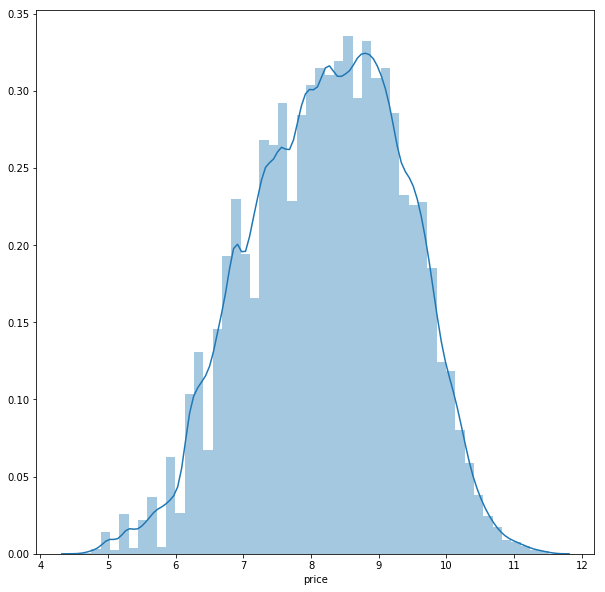

In [39]:
# How about the data is a lognormal distribution or not?

plt.subplots(figsize=(10,10))
log_price=np.log(df['price'])
df['price'] = log_price
sns.distplot(log_price)

Since our target data price is distributed log-normally, we will use the log-price as the price in our data set.

In [40]:
stats.normaltest(log_price)

NormaltestResult(statistic=4886.424086198349, pvalue=0.0)

The data is lognormally distributed

## Machine Learning

### Linear Regression

First, lets split our data into Train and Test sets

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246274 entries, 0 to 246273
Data columns (total 14 columns):
brand                 246274 non-null object
model                 246274 non-null object
vehicleType           246274 non-null object
yearOfRegistration    246274 non-null int64
gearbox               246274 non-null object
powerPS               246274 non-null int64
kilometer             246274 non-null float64
fuelType              246274 non-null object
notRepairedDamage     246274 non-null object
dateCreated           246274 non-null datetime64[ns]
postalCode            246274 non-null float64
lastSeen              246274 non-null object
Age                   246274 non-null int64
price                 246274 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 26.3+ MB


In [42]:
numeric_cols=['price','Age','kilometer','powerPS','yearOfRegistration']

In [43]:
from sklearn.model_selection import train_test_split
df_Numeric = df[numeric_cols]
print(df_Numeric.columns)
X_train, X_test, y_train, y_test = train_test_split(df_Numeric.drop('price',axis=1), df_Numeric.price, test_size = 0.3, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(df_Numeric.drop('price',axis=1), log_price, test_size = 0.3, random_state=42)

Index(['price', 'Age', 'kilometer', 'powerPS', 'yearOfRegistration'], dtype='object')


In [44]:
def eval_metrics(actual, pred):
    r2 = r2_score(actual, pred)
    mse = mean_squared_error(actual, pred)
    mae = mean_absolute_error(actual, pred)
    print("r2: {}, mse: {}, mae: {}".format(r2, mse, mae))

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lireg=LinearRegression()
lireg.fit(X_train, y_train)

eval_metrics(y_test, lireg.predict(X_test))

# print(lireg.score(X_test,y_test))
# MeanSquaredError = mean_squared_error(y_test,lireg.predict(X_test))
# print(MeanSquaredError)

r2: 0.6497926407428374, mse: 0.44611941766032714, mae: 0.4703030167087086


In [46]:
print('Estimated intercept coefficient: {}'.format(lireg.intercept_))
print('Number of coefficients: {}'.format(len(lireg.coef_)))
pd.DataFrame({'features': X_train.columns, 'estimatedCoefficients': lireg.coef_})[['features', 'estimatedCoefficients']]

Estimated intercept coefficient: -641.1806844238943
Number of coefficients: 4


,features,estimatedCoefficients
0,Age,0.241045
1,kilometer,-0.000007
2,powerPS,0.008509
3,yearOfRegistration,0.322507


Using statsmodel on our dataset

In [47]:
import statsmodels.formula.api as smf

model = smf.ols(formula='price ~ yearOfRegistration + powerPS + kilometer + Age',data=df_Numeric).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                 1.157e+05
Date:                Wed, 07 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:23:59   Log-Likelihood:            -2.4887e+05
No. Observations:              246274   AIC:                         4.977e+05
Df Residuals:                  246269   BIC:                         4.978e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -194.2810    273

Now we can test the data with original values

Text(0.5, 0, 'Original Values')

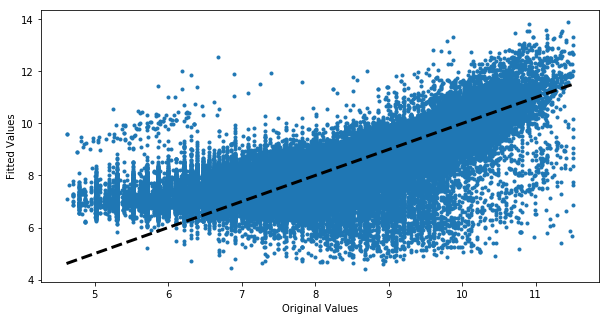

In [48]:
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(df_Numeric.price,model.fittedvalues,marker='.')
ax.plot([df_Numeric.price.min(),df_Numeric.price.max()],[df_Numeric.price.min(),df_Numeric.price.max()],'k--',lw=3)
ax.set_ylabel('Fitted Values')
ax.set_xlabel('Original Values')

Similar to the results of our regression model (low R squared(0.65) It seemd like our linear model is not very accurate in predicting some values both for lower and higher values. We can apply Cross Validation

In [49]:
lr = LinearRegression()

cvresult = cross_val_score(lr, df_Numeric.drop('price',axis=1),df_Numeric.price,cv=5)

print(cvresult)

[0.65825541 0.6502393  0.65245227 0.65244323 0.64961288]


Best score after cross validation is 0.61867143. we can also apply Ridge, Lasso and standart scaling

In [50]:
# RIDGE

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rdg = Ridge(alpha=.1,normalize=True)

rdg.fit(X_train,y_train)

rdg.score(X_test,y_test)

RSquaredValue = r2_score(y_test, rdg.predict(X_test))
MeanSquaredError = mean_squared_error(y_test,rdg.predict(X_test))
print('R2 :',RSquaredValue)
print('MSE: ',MeanSquaredError)

R2 : 0.6473744271043674
MSE:  0.44919991277745097


In [51]:
# LASSO

from sklearn.linear_model import Lasso
ls = Lasso(alpha=.1,normalize=True)

ls.fit(X_train,y_train)

ls.score(X_test,y_test)

R2 = r2_score(y_test, ls.predict(X_test))
MeanSquaredError = mean_squared_error(y_test,ls.predict(X_test))
print('R2 :',R2)
print('MSE: ',MeanSquaredError)

R2 : -1.4634017775350117e-08
MSE:  1.2738722142650762


In [52]:
# STANDART SCALING, PIPELINE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
est = []
est.append(('standardize', StandardScaler()))
est.append(('LR', LinearRegression()))
pipe = Pipeline(est)

pipe.fit(X_train,y_train)

pipe.score(X_test,y_test)

R2 = r2_score(y_test, pipe.predict(X_test))
MeanSquaredError = mean_squared_error(y_test,pipe.predict(X_test))
print('R2 :',RSquaredValue)
print('MSE: ',MeanSquaredError)

R2 : 0.6473744271043674
MSE:  0.44611941766034224


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by 

Now we can apply our models to non-numeric features

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246274 entries, 0 to 246273
Data columns (total 14 columns):
brand                 246274 non-null object
model                 246274 non-null object
vehicleType           246274 non-null object
yearOfRegistration    246274 non-null int64
gearbox               246274 non-null object
powerPS               246274 non-null int64
kilometer             246274 non-null float64
fuelType              246274 non-null object
notRepairedDamage     246274 non-null object
dateCreated           246274 non-null datetime64[ns]
postalCode            246274 non-null float64
lastSeen              246274 non-null object
Age                   246274 non-null int64
price                 246274 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 26.3+ MB


In [54]:
nonnum=['vehicleType', 'gearbox', 'model', 'fuelType', 'brand',
       'notRepairedDamage']
df_nonnum=df[nonnum]
dummy = pd.get_dummies(df_nonnum)

dfdummy = pd.concat([df_Numeric,dummy], axis =1)
dfdummy.head(10)

,price,Age,kilometer,powerPS,yearOfRegistration,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_other,...,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_no,notRepairedDamage_yes
0,7.313220,15,150000.0,75,2001,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,8.188689,8,90000.0,69,2008,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,6.476972,21,150000.0,102,1995,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,7.696213,12,150000.0,109,2004,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,7.600902,12,150000.0,105,2004,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,7.937017,11,150000.0,140,2005,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6,9.798071,5,70000.0,190,2011,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,7.467371,12,150000.0,75,2004,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,8.929303,9,150000.0,136,2007,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,7.522941,12,150000.0,102,2004,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Now we can apply our models with non numeric values

In [55]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(dfdummy.drop('price',axis=1), 
                                                        dfdummy.price, test_size = 0.3, random_state=42)

Lireg = LinearRegression()

Lireg.fit(X_train2, y_train2)

#print(Linreg.score(X_testN,y_testN))

R2 = r2_score(y_test2, Lireg.predict(X_test2))
MeanSquaredError = mean_squared_error(y_test2,Lireg.predict(X_test2))
print('R2 :',R2)
print('M: ',MeanSquaredError)

R2 : 0.7900137800075206
M:  0.26749560711243764


In [56]:
# RIDGE

rdg = Ridge(alpha=.1,normalize=True)

rdg.fit(X_train2,y_train2)

R2 = r2_score(y_test2, rdg.predict(X_test2))
MeanSquaredError = mean_squared_error(y_test2,rdg.predict(X_test2))
print('R2 :',R2)
print('Mean Squared Value: ',MeanSquaredError)

R2 : 0.7859480506677278
Mean Squared Value:  0.2726748266733292


In [57]:
# LASSO

lss = Lasso(alpha=.1,normalize=True)

lss.fit(X_train2,y_train2)

R2 = r2_score(y_test2, lss.predict(X_test2))
MeanSquaredError = mean_squared_error(y_test2,lss.predict(X_test2))
print('R2 :',R2)
print('Mean Squared Value: ',MeanSquaredError)

R2 : -1.4634017775350117e-08
Mean Squared Value:  1.2738722142650762


In [58]:
# CROSS VAL.

cvdummy = cross_val_score(lireg, dfdummy.drop('price',axis=1),dfdummy.price,cv=5)

print('Cross Validation Scores With Dummies:',cvdummy)

Cross Validation Scores With Dummies: [0.79533491 0.79049578 0.79273733 0.79469043 0.79231673]


In [59]:
# best score after cross validation
print(max(cvdummy))

0.7953349119702615


### Decision Tree

In [60]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=5,
                            min_samples_split=10,
                            max_leaf_nodes=100)
dtr.fit(X_train2,y_train2)
dtr.score(X_train2, y_train2)

0.778397407299417

### Random Forest

with numeric features

In [61]:
from sklearn.ensemble import RandomForestRegressor
frst=RandomForestRegressor(n_estimators=100,random_state=0)
frst.fit(X_train,y_train)

print('Accuracy, training: {:.3f}'.format(frst.score(X_train, y_train)))
print('Accuracy, test: {:.3f}'.format(frst.score(X_test, y_test)))

R2 = r2_score(y_test, frst.predict(X_test))
MSE= mean_squared_error(y_test,frst.predict(X_test))
print('R2 :',R2)
print('MSE:', MSE)

Accuracy, training: 0.839
Accuracy, test: 0.800
R2 : 0.8002992607540091
MSE: 0.25439321917086805


with all features

In [62]:

frst=RandomForestRegressor(n_jobs=-1, n_estimators=100,random_state=0)
frst.fit(X_train2,y_train2)

print('Accuracy, training: {:.3f}'.format(frst.score(X_train2, y_train2)))
print('Accuracy, test: {:.3f}'.format(frst.score(X_test2, y_test2)))

R2 = r2_score(y_test2, frst.predict(X_test2))
MSE= mean_squared_error(y_test2,frst.predict(X_test2))
print('R2 :',R2)
print('MSE:', MSE)

Accuracy, training: 0.949
Accuracy, test: 0.883
R2 : 0.8832211712757383
MSE: 0.14876130294928172


### Grid Search

In [67]:
# lets apply grid search on our model

from sklearn.model_selection import GridSearchCV

rnf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "n_estimators": [200]}
grs = GridSearchCV(estimator=rnf, param_grid=param_grid, cv=2, verbose=1)
grs = grs.fit(X_train2, y_train2)

print(grs.best_score_)
print(grs.best_params_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.8min finished


0.8820434230924076
{'criterion': 'mse', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 200}


Lets see the result on a residual plot after grid search 

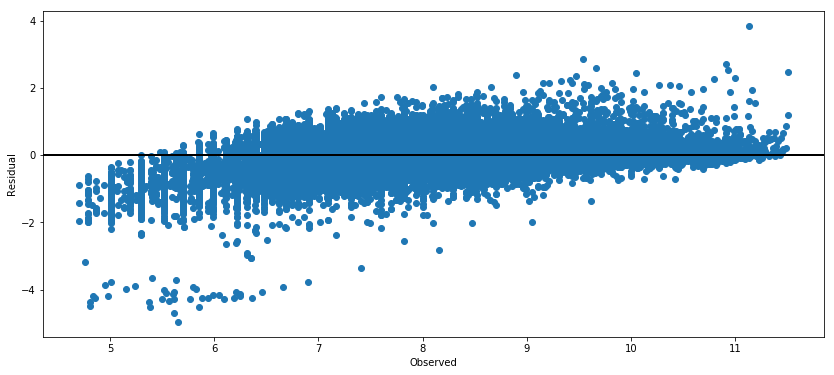

In [68]:
prdct = grs.best_estimator_.predict(X_test2)
rsdl = y_test2 - prdct
fig, ax = plt.subplots(figsize=(14,6))
ax.scatter(y_test2, rsdl)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [69]:
# from math import e
# y_test2=e**(y_test2)
# predict=e**(predict)

Lets also try random search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
# rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = frst, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train2, y_train2)